In [29]:
# Binary Classifier with TensorFlow in 15 Minutes: Mushroom Classification

In [30]:
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/fenago/datasets/main/mushrooms.csv'
df = pd.read_csv(url)
df.sample(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
2828,e,x,y,g,t,n,f,c,b,p,...,s,g,p,p,w,o,p,n,y,d
487,e,s,f,n,f,n,f,c,n,p,...,s,w,w,p,w,o,p,n,y,u
4133,p,x,s,g,f,c,f,c,n,g,...,s,w,w,p,w,o,p,k,s,d
165,e,f,y,y,t,l,f,c,b,w,...,y,w,w,p,w,o,p,n,y,p
2162,e,f,f,g,t,n,f,c,b,p,...,s,g,p,p,w,o,p,k,v,d


In [31]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [32]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('class_p', axis=1)
y = df_encoded['class_p']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
import tensorflow as tf
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy')
    ]
)

history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9190 - loss: 0.2370
Epoch 2/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0013
Epoch 3/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 2.0677e-04
Epoch 4/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 7.8299e-05
Epoch 5/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 4.1698e-05
Epoch 6/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 2.5693e-05
Epoch 7/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1.7321e-05
Epoch 8/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1.2266e-05
Epoch 9/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 9.0537e-06
Epoch 10/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 6.8993e-06
Epoch 11/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 5.3870e-06
Epoch

In [35]:
predictions = model.predict(X_test)

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [36]:
prediction_classes_class = [
    'p' if prob > 0.5 else 'e' for prob in np.ravel(predictions)
]
# convert prediction probabilities to binary predictions
prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]

prediction_classes

[0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,


In [37]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, prediction_classes))

[[843   0]
 [  0 782]]


In [38]:
from sklearn.metrics import accuracy_score

print(f'Accuracy: {accuracy_score(y_test, prediction_classes):.2f}')

Accuracy: 1.00


In [39]:
# change learning rate
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # decreasing learning rate
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy')
    ]
)

history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7554 - loss: 0.5916
Epoch 2/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9510 - loss: 0.1602
Epoch 3/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9838 - loss: 0.0485
Epoch 4/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9959 - loss: 0.0194
Epoch 5/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9986 - loss: 0.0100
Epoch 6/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9992 - loss: 0.0056
Epoch 7/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0034
Epoch 8/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0022
Epoch 9/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0015
Epoch 10/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0011
Epoch 11/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 7.9842e-04
Epoch 12/100
204/204 ━━━━━━━━━━━━━━━━

In [41]:
# add addition layer
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'), # adding another layer
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy')
    ]
)

history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9428 - loss: 0.1915
Epoch 2/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 6.5721e-04
Epoch 3/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 6.8535e-05
Epoch 4/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 2.7041e-05
Epoch 5/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 1.3450e-05
Epoch 6/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 1.0000 - loss: 7.6989e-06
Epoch 7/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 1.0000 - loss: 4.8579e-06
Epoch 8/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 3.2951e-06
Epoch 9/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 2.3526e-06
Epoch 10/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 1.7468e-06
Epoch 11/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 1.3350e-06
E

In [42]:
# L1 Regularization
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping


model_l1 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_l1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy')
    ]
)
early_stop = EarlyStopping(
    monitor='val_loss',
    mode='min',
    verbose=1,
    patience=10,
    restore_best_weights=True
)

history_l1 = model_l1.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)

Epoch 1/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9055 - loss: 2.0084 - val_accuracy: 0.9988 - val_loss: 0.4264
Epoch 2/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9979 - loss: 0.3473 - val_accuracy: 0.9988 - val_loss: 0.2124
Epoch 3/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9984 - loss: 0.1935 - val_accuracy: 0.9994 - val_loss: 0.1442
Epoch 4/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9986 - loss: 0.1357 - val_accuracy: 0.9994 - val_loss: 0.1083
Epoch 5/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9987 - loss: 0.1039 - val_accuracy: 0.9994 - val_loss: 0.0870
Epoch 6/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9987 - loss: 0.0844 - val_accuracy: 0.9994 - val_loss: 0.0728
Epoch 7/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9990 - loss: 0.0710 - val_accuracy: 0.9994 - val_loss: 0.0625
Epoch 8/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9990 - loss: 0.0613 - val_accu

In [43]:
# stop early
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy')
    ]
)
early_stop = EarlyStopping(
    monitor='val_loss',
    mode='min',
    verbose=1,
    patience=10,
    restore_best_weights=True
)
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7837 - loss: 2.3901 - val_accuracy: 0.9858 - val_loss: 0.8176
Epoch 2/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9796 - loss: 0.6960 - val_accuracy: 0.9957 - val_loss: 0.3744
Epoch 3/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9877 - loss: 0.3657 - val_accuracy: 0.9988 - val_loss: 0.2559
Epoch 4/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9899 - loss: 0.2753 - val_accuracy: 0.9988 - val_loss: 0.2061
Epoch 5/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9933 - loss: 0.2246 - val_accuracy: 0.9988 - val_loss: 0.1789
Epoch 6/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9932 - loss: 0.1971 - val_accuracy: 0.9988 - val_loss: 0.1607
Epoch 7/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9936 - loss: 0.1821 - val_accuracy: 0.9994 - val_loss: 0.1467
Epoch 8/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9933 - loss: 0.1679 - val_acc

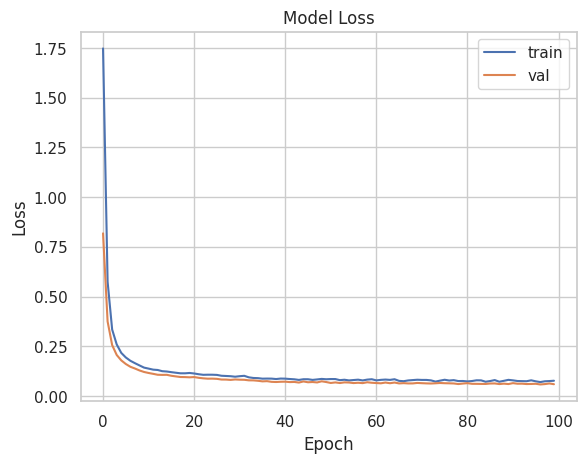

In [44]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [51]:
predictions = model.predict(X_test)

51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [52]:
model.save('mushroom_classification_model.h5')

In [53]:
from tensorflow.keras.models import load_model

loaded_model = load_model('mushroom_classification_model.h5')

In [54]:
new_data = pd.DataFrame({
    'cap-shape': ['f'],
    'cap-surface': ['y'],
    'cap-color': ['n'],
    'bruises': ['f'],
    'odor': ['a'],
    'gill-attachment': ['f'],
    'gill-spacing': ['c'],
    'gill-size': ['n'],
    'gill-color': ['b'],
    'stalk-shape': ['e'],
    'stalk-root': ['c'],
    'stalk-surface-above-ring': ['s'],
    'stalk-surface-below-ring': ['s'],
    'stalk-color-above-ring': ['w'],
    'stalk-color-below-ring': ['w'],
    'veil-type': ['p'],
    'veil-color': ['w'],
    'ring-number': ['o'],
    'ring-type': ['p'],
    'spore-print-color': ['n'],
    'population': ['c'],
    'habitat': ['l']
})

In [55]:
new_data_encoded = pd.get_dummies(new_data)
new_data_encoded = new_data_encoded.reindex(columns=X.columns, fill_value=0)

In [59]:
prediction = loaded_model.predict(new_data_encoded.to_numpy().astype('float32'))
prediction_class = int(prediction > 0.5)

print('Prediction:', prediction_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Prediction: 1


<ipython-input-59-a0145a775ae4>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prediction_class = int(prediction > 0.5)
